# Net disbursements of official development assistance from donors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Net Disbursements from Official ODA to Recipients.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df    

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,1,"Total, all countries or areas",1985,Net official development assistance received: ...,25604.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
1,1,"Total, all countries or areas",1995,Net official development assistance received: ...,46875.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
2,1,"Total, all countries or areas",2005,Net official development assistance received: ...,81833.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
3,1,"Total, all countries or areas",2010,Net official development assistance received: ...,92131.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
4,1,"Total, all countries or areas",2015,Net official development assistance received: ...,111374.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
...,...,...,...,...,...,...,...,...
4948,716,Zimbabwe,2010,Net official development assistance received: ...,6.7,NaN,Organisation for Economic Co-operation and Dev...,NaN
4949,716,Zimbabwe,2015,Net official development assistance received: ...,4.4,NaN,Organisation for Economic Co-operation and Dev...,NaN
4950,716,Zimbabwe,2017,Net official development assistance received: ...,3.6,NaN,Organisation for Economic Co-operation and Dev...,NaN
4951,716,Zimbabwe,2018,Net official development assistance received: ...,3.5,NaN,Organisation for Economic Co-operation and Dev...,NaN


In [5]:
df.shape

(4953, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  4953 non-null   int64  
 1   Unnamed: 1           4953 non-null   object 
 2   Year                 4953 non-null   int64  
 3   Series               4953 non-null   object 
 4   Value                4953 non-null   float64
 5   Footnotes            304 non-null    object 
 6   Source               4953 non-null   object 
 7   Unnamed: 7           32 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 309.7+ KB


In [7]:
df.rename(                                                               # rename columns
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

df.head()  

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,1,"Total, all countries or areas",1985,Net official development assistance received: ...,25604.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
1,1,"Total, all countries or areas",1995,Net official development assistance received: ...,46875.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
2,1,"Total, all countries or areas",2005,Net official development assistance received: ...,81833.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
3,1,"Total, all countries or areas",2010,Net official development assistance received: ...,92131.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
4,1,"Total, all countries or areas",2015,Net official development assistance received: ...,111374.0,NaN,Organisation for Economic Co-operation and Dev...,NaN


In [8]:
df.drop(columns=['Footnotes', 'Source', 'Unnamed: 7'], inplace=True)      # drop footnotes, source and unnamed columns

In [9]:
df.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",1985,Net official development assistance received: ...,25604.0
1,1,"Total, all countries or areas",1995,Net official development assistance received: ...,46875.0
2,1,"Total, all countries or areas",2005,Net official development assistance received: ...,81833.0
3,1,"Total, all countries or areas",2010,Net official development assistance received: ...,92131.0
4,1,"Total, all countries or areas",2015,Net official development assistance received: ...,111374.0


In [10]:
df.describe(include='object')  

,Region/Country/Area,Series
count,4953,4953
unique,188,4
top,"Total, all countries or areas",Net official development assistance received: ...
freq,32,1286


In [11]:
df['Code'].value_counts().head()

1      32
214    32
462    32
458    32
454    32
Name: Code, dtype: int64

In [12]:
df['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Africa', 'Americas',
       'South America', 'Asia', 'South-central Asia', 'Europe', 'Oceania',
       'Micronesia', 'Areas not specified', 'Afghanistan', 'Albania',
       'Algeria', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'C�te d�Ivoire', 'Croatia',
       'Cuba', 'Cyprus', "Dem. People's Rep. Korea",
       'Dem. Rep. of the Congo', 'Djibouti', 'Dominica',
       'Dominic

In [13]:
df['Year']

0       1985
1       1995
2       2005
3       2010
4       2015
        ... 
4948    2010
4949    2015
4950    2017
4951    2018
4952    2019
Name: Year, Length: 4953, dtype: int64

In [14]:
df['Series'].unique()

array(['Net official development assistance received: Bilateral  (millions of US dollars)',
       'Net official development assistance received: Multilateral (millions of US dollars)',
       'Net official development assistance received: Total (millions of US dollars)',
       'Net official development assistance received: Total (as % GNI)'],
      dtype=object)

# Data Cleaning

In [15]:
df['Region/Country/Area'].replace({'C�te d�Ivoire': "Côte d'Ivoire"}, inplace=True)

df['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Africa', 'Americas',
       'South America', 'Asia', 'South-central Asia', 'Europe', 'Oceania',
       'Micronesia', 'Areas not specified', 'Afghanistan', 'Albania',
       'Algeria', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', "Dem. People's Rep. Korea",
       'Dem. Rep. of the Congo', 'Djibouti', 'Dominica',
       'Dominic

In [16]:
df['Value'].describe()

count      4953.000000
mean       1115.546517
std        7559.186793
min       -1217.000000
25%           7.000000
50%          62.000000
75%         329.000000
max      167560.000000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

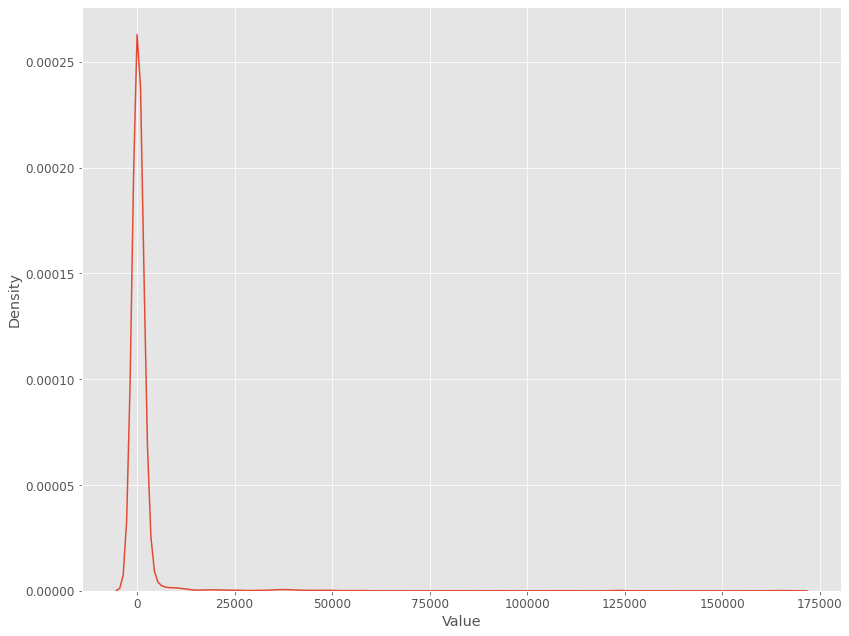

In [17]:
sns.kdeplot(data=df, x='Value')

# Missing Values Exploration

In [18]:
df.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

In [19]:
cols = ['Net official development assistance received: Bilateral  (millions of US dollars)',
       'Net official development assistance received: Multilateral (millions of US dollars)',
       'Net official development assistance received: Total (millions of US dollars)']

df_num_grpd = df[df['Series'].isin(cols)].groupby('Region/Country/Area')                      

df_num_grpd.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",1985,Net official development assistance received: ...,25604.0
1,1,"Total, all countries or areas",1995,Net official development assistance received: ...,46875.0
2,1,"Total, all countries or areas",2005,Net official development assistance received: ...,81833.0
3,1,"Total, all countries or areas",2010,Net official development assistance received: ...,92131.0
4,1,"Total, all countries or areas",2015,Net official development assistance received: ...,111374.0
...,...,...,...,...,...
4921,716,Zimbabwe,1985,Net official development assistance received: ...,218.0
4922,716,Zimbabwe,1995,Net official development assistance received: ...,438.0
4923,716,Zimbabwe,2005,Net official development assistance received: ...,162.0
4924,716,Zimbabwe,2010,Net official development assistance received: ...,478.0


# Data Visualization

In [20]:
from matplotlib.ticker import FuncFormatter

# y-axis formatter functions
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)

# helper function to visualize bar chart
def plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None):
  # create figure and axis
  fig, ax = plt.subplots()
  fig.autofmt_xdate()

  # plot bar graphs
  sns.barplot(
    data=data, 
    x=x, y=y, 
    hue=hue, ci=ci,
    ax=ax
  )

  # label plot axis
  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

  # set y-axis formatter
  ax.yaxis.set_major_formatter(formatter=formatter)

  return plot_bar


# helper function to visualize line chart
def plot_line(data, x, y, hue=None, ci=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
  # create figure and axis
  fig, ax = plt.subplots()
  fig.autofmt_xdate()

  # plot bar graphs
  sns.lineplot(
    data=data, 
    x=x, y=y, 
    hue=hue, ci=ci, size=size, style=style,
    ax=ax
  )

  # label plot axis
  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

  # set y-axis formatter
  ax.yaxis.set_major_formatter(formatter=formatter)

  return plot_line

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

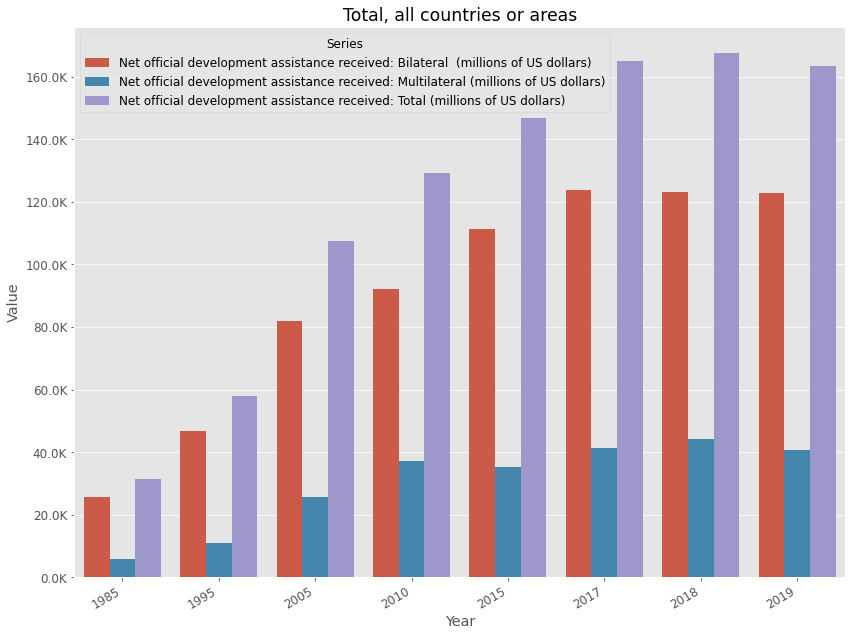

In [21]:
plot_bar(
  data=df_num_grpd.get_group('Total, all countries or areas'),
  x='Year', y='Value', hue='Series',
  title='Total, all countries or areas', xlabel='Year', ylabel='Value',
  formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, ci=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

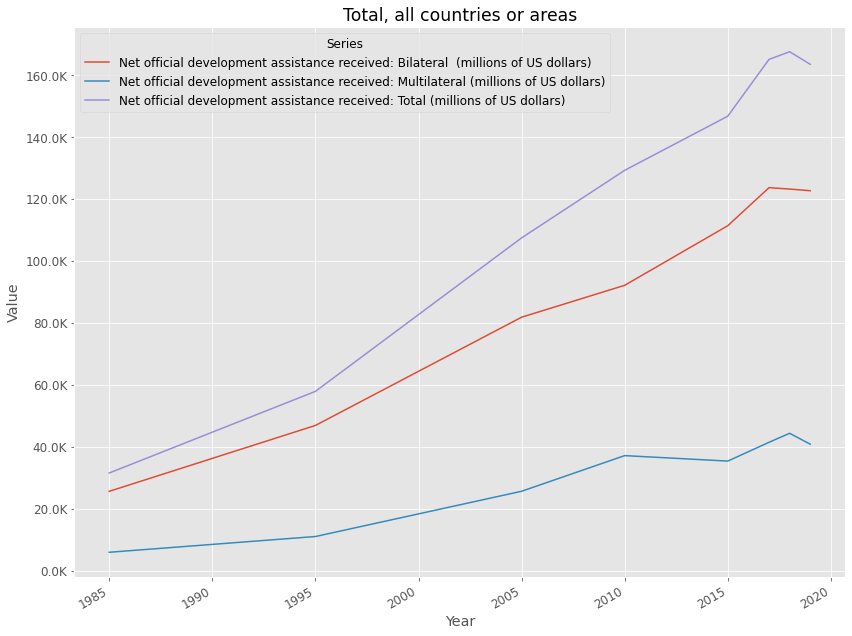

In [22]:
plot_line(
  data=df_num_grpd.get_group('Total, all countries or areas'),
  x='Year', y='Value', hue='Series',
  title='Total, all countries or areas', xlabel='Year', ylabel='Value',
  formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

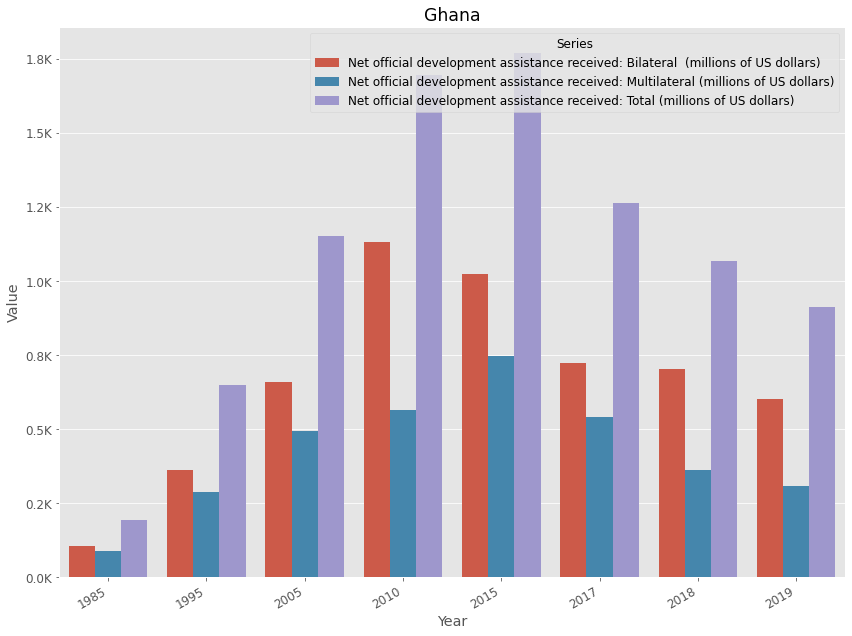

In [23]:
plot_bar(
  data=df_num_grpd.get_group('Ghana'),
  x='Year', y='Value', hue='Series',
  title='Ghana', xlabel='Year', ylabel='Value',
  formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, ci=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

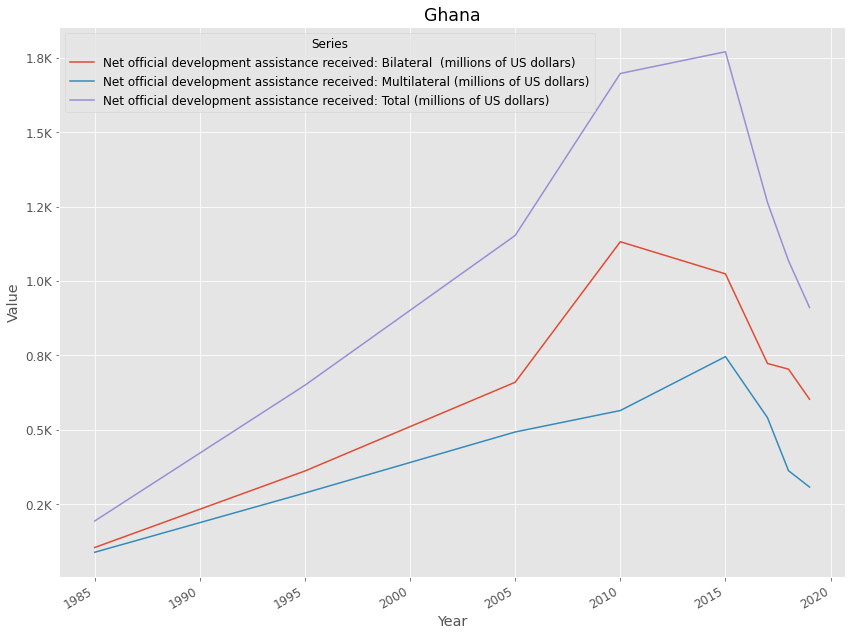

In [24]:
plot_line(
  data=df_num_grpd.get_group('Ghana'),
  x='Year', y='Value', hue='Series',
  title='Ghana', xlabel='Year', ylabel='Value',
  formatter=format_tsd
)

# GNI Exploration

In [25]:
df_pct_grpd = df[~df['Series'].isin(cols)].groupby('Region/Country/Area')

df_pct_grpd.head()

,Code,Region/Country/Area,Year,Series,Value
24,1,"Total, all countries or areas",1985,Net official development assistance received: ...,1.3
25,1,"Total, all countries or areas",1995,Net official development assistance received: ...,1.0
26,1,"Total, all countries or areas",2005,Net official development assistance received: ...,1.2
27,1,"Total, all countries or areas",2010,Net official development assistance received: ...,0.7
28,1,"Total, all countries or areas",2015,Net official development assistance received: ...,0.6
...,...,...,...,...,...
4945,716,Zimbabwe,1985,Net official development assistance received: ...,4.3
4946,716,Zimbabwe,1995,Net official development assistance received: ...,7.2
4947,716,Zimbabwe,2005,Net official development assistance received: ...,6.8
4948,716,Zimbabwe,2010,Net official development assistance received: ...,6.7


<function __main__.plot_line(data, x, y, hue=None, ci=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

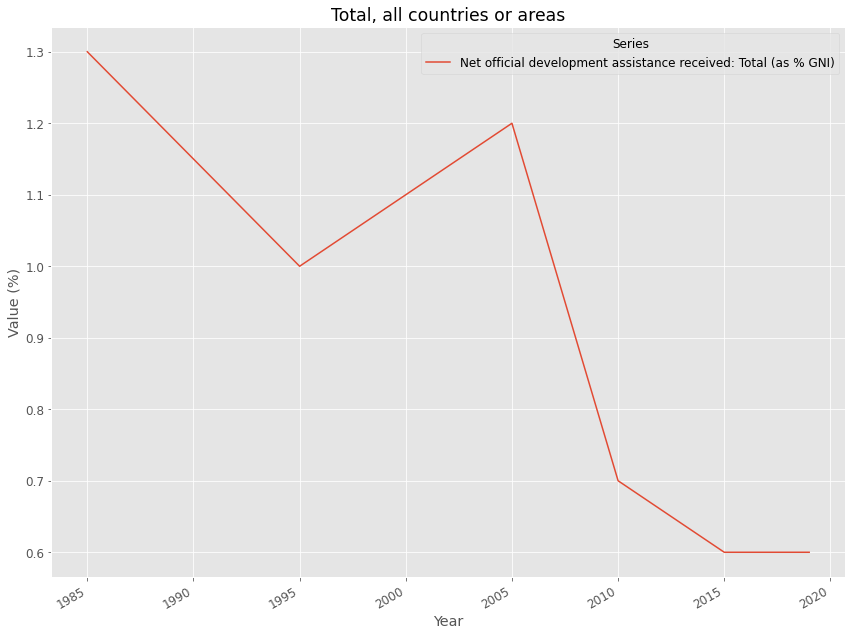

In [26]:
plot_line(
  data=df_pct_grpd.get_group('Total, all countries or areas'),
  x='Year', y='Value', hue='Series',
  title='Total, all countries or areas', xlabel='Year', ylabel='Value (%)',
  formatter=format_orig
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

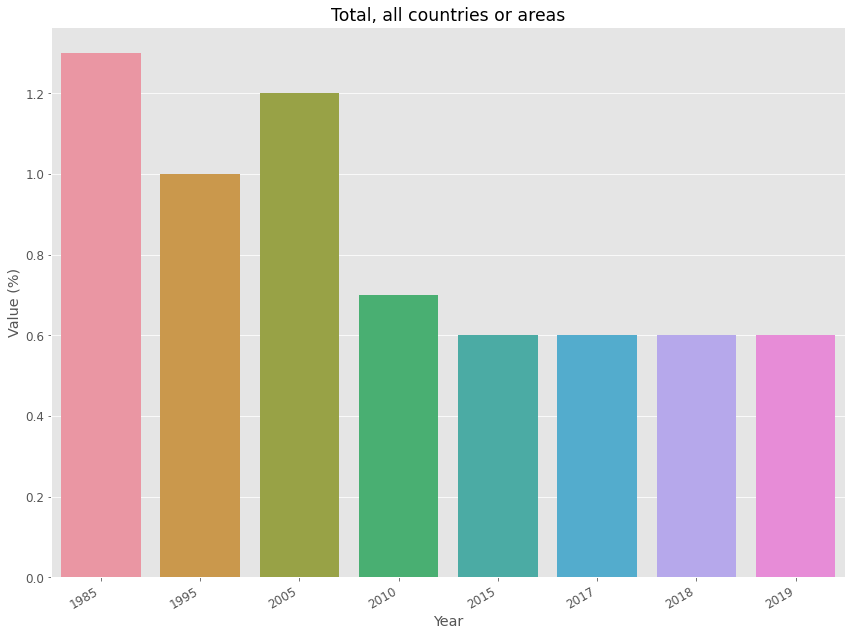

In [27]:
plot_bar(
  data=df_pct_grpd.get_group('Total, all countries or areas'),
  x='Year', y='Value',
  title='Total, all countries or areas', xlabel='Year', ylabel='Value (%)',
  formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, ci=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

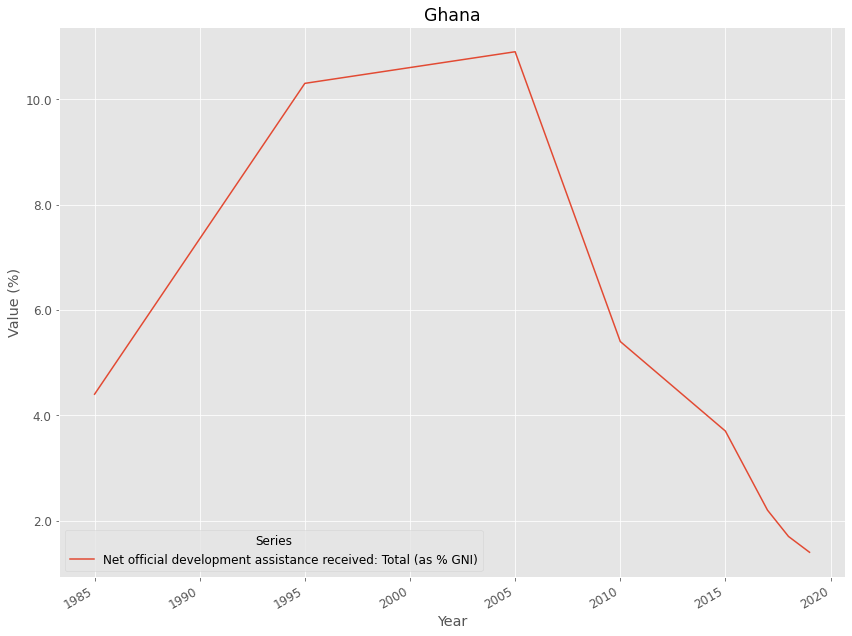

In [28]:
plot_line(
  data=df_pct_grpd.get_group('Ghana'),
  x='Year', y='Value', hue='Series',
  title='Ghana', xlabel='Year', ylabel='Value (%)',
  formatter=format_orig
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

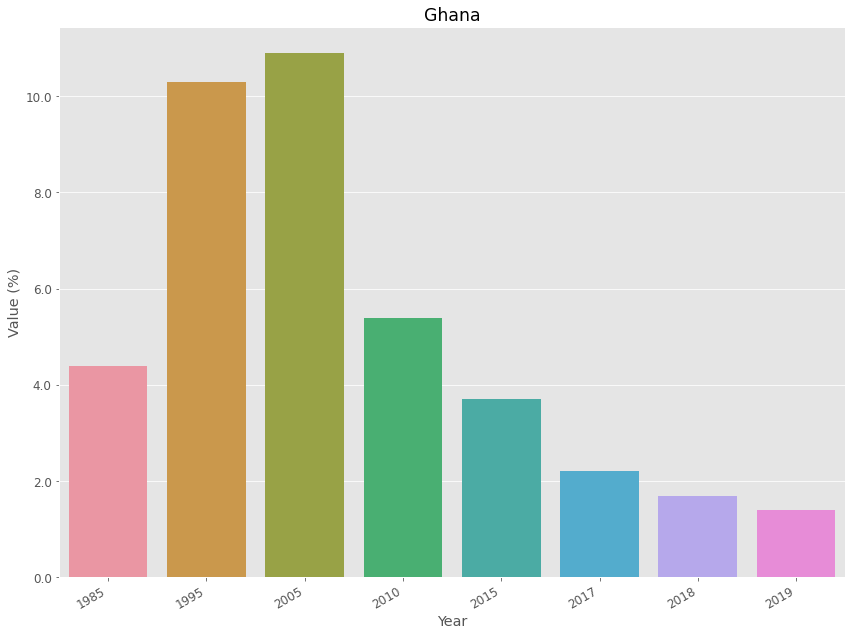

In [29]:
plot_bar(
  data=df_pct_grpd.get_group('Ghana'),
  x='Year', y='Value',
  title='Ghana', xlabel='Year', ylabel='Value (%)',
  formatter=format_orig
)